# The Curse of Dimensionality - Lab

## Introduction

In this lab, you'll conduct some mathematical simulations to further investigate the consequences of the curse of dimensionality.

## Objectives

In this lab you will: 

- Create and interpret a visual demonstrating how sparsity changes with n for n-dimensional spaces 
- Demonstrate how training time increases exponentially as the number of features increases


## Sparseness in N-Dimensional Space

As discussed, points in n-dimensional space become increasingly sparse as the number of dimensions increases. To demonstrate this, you'll write a function to calculate the Euclidean distance between two points. From there, you'll then generate random points in n-dimensional space, calculate their average distance from the origin, and plot the relationship between this average distance and n.

## Euclidean Distance

To start, write a function which takes two points, p1 and p2, and returns the Euclidean distance between them. Recall that the Euclidean distance between two points is given by:  

$$ d(a,b) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + ... + (a_n - b_n)^2} $$

In [1]:
import numpy as np

In [2]:
def euclidean_distance(p1, p2):
     return np.sqrt(np.sum((np.array(p1) - np.array(p2))**2))

## Average Distance From the Origin

To examine the curse of dimensionality, you'll investigate the average distance to the center of n-dimensional space. As you'll see, this average distance increases as the number of dimensions increases. To investigate this, generate 100 random points for various n-dimensional spaces. Investigate n-dimensional spaces from n=1 to n=1000. In each of these, construct the 100 random points using a random number between -10 and 10 for each dimension of the point. From there, calculate the average distance from each of these points to the origin. Finally, plot this relationship on a graph; the x-axis will be n, the number of dimensions, and the y-axis will be the average distance from the origin.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

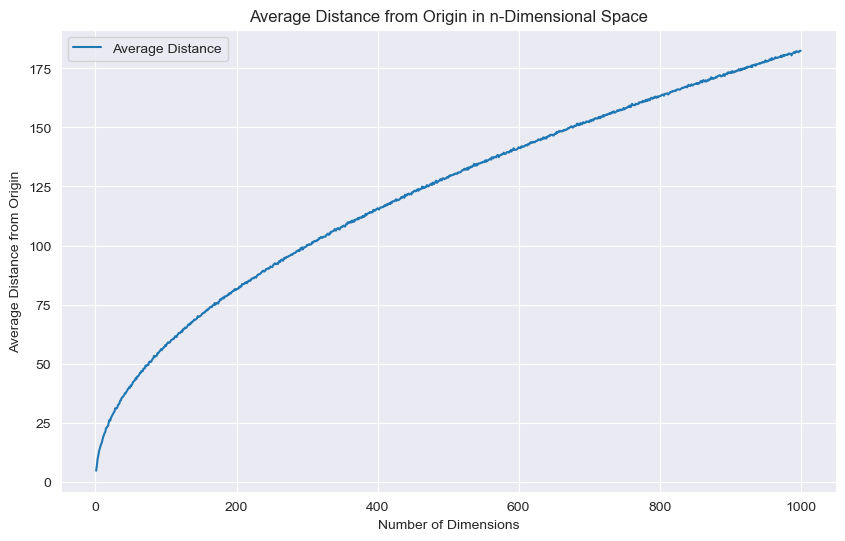

In [4]:
def calculate_average_distance(num_points, num_dimensions):
    # Generate random points in the given number of dimensions
    points = np.random.uniform(-10, 10, (num_points, num_dimensions))
    # Calculate the Euclidean distance from the origin for each point
    distances = np.sqrt(np.sum(points**2, axis=1))
    # Return the average distance
    return np.mean(distances)

# Number of points to generate in each dimension
num_points = 100
# Range of dimensions to investigate
dimensions = range(1, 1001)
# Store the average distances for each dimension
average_distances = []

for dim in dimensions:
    avg_distance = calculate_average_distance(num_points, dim)
    average_distances.append(avg_distance)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(dimensions, average_distances, label='Average Distance')
plt.xlabel('Number of Dimensions')
plt.ylabel('Average Distance from Origin')
plt.title('Average Distance from Origin in n-Dimensional Space')
plt.legend()
plt.show()

## Convergence Time

As mentioned before, another issue with increasing the dimension of the feature space is the training time required to fit a machine learning model. While more data will generally lead to better predictive results, it will also substantially increase training time. To demonstrate this, generate lists of random numbers as you did above. Then, use this list of random numbers as a feature in a mock dataset; choose an arbitrary coefficient and multiply the feature vector by this coefficient. Then, sum these feature-coefficient products to get an output, `y`. To spice things up (and not have a completely deterministic relationship), add a normally distributed white noise parameter to your output values. Fit an ordinary least squares model to your generated mock data. Repeat this for a varying number of features, and record the time required to fit the model. (Be sure to only record the time to train the model, not the time to generate the data.) Finally, plot the number of features, n, versus the training time for the subsequent model.

In [5]:
import pandas as pd
import datetime
from sklearn.linear_model import LinearRegression, Lasso

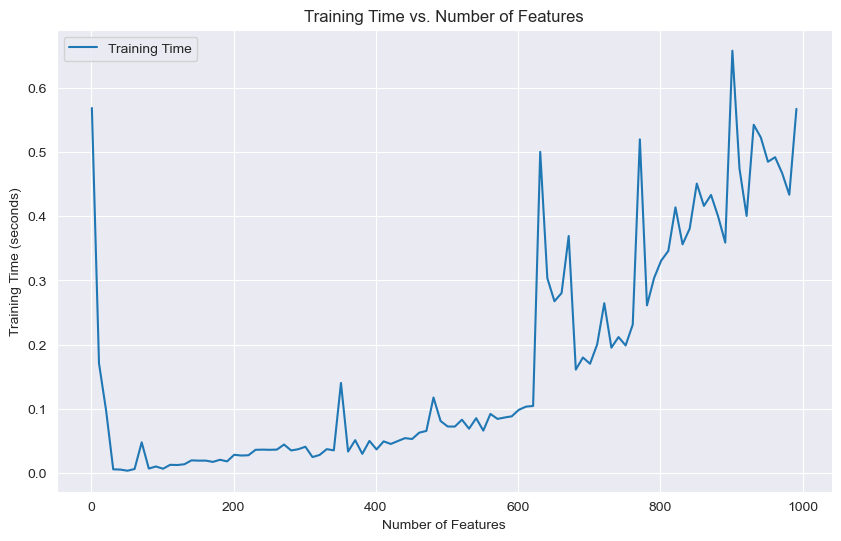

In [6]:
def generate_mock_data(num_samples, num_features, coefficient=1.0, noise_std=0.1):
    # Generate random features
    X = np.random.uniform(-10, 10, (num_samples, num_features))
    # Generate coefficients
    coeffs = np.random.uniform(-1, 1, num_features) * coefficient
    # Generate output with added noise
    y = X @ coeffs + np.random.normal(0, noise_std, num_samples)
    return X, y

def measure_training_time(num_samples, num_features):
    # Generate the mock data
    X, y = generate_mock_data(num_samples, num_features)
    # Create the linear regression model
    model = LinearRegression()
    # Measure the time taken to fit the model
    start_time = datetime.datetime.now()
    model.fit(X, y)
    end_time = datetime.datetime.now()
    training_time = (end_time - start_time).total_seconds()
    return training_time

# Parameters
num_samples = 1000
max_features = 1000
feature_range = range(1, max_features + 1, 10)  # Use step of 10 for faster computation
training_times = []

# Measure training time for each number of features
for num_features in feature_range:
    training_time = measure_training_time(num_samples, num_features)
    training_times.append(training_time)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(feature_range, training_times, label='Training Time')
plt.xlabel('Number of Features')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Number of Features')
plt.legend()
plt.show()


- Repeat the same experiment for a Lasso penalized regression model

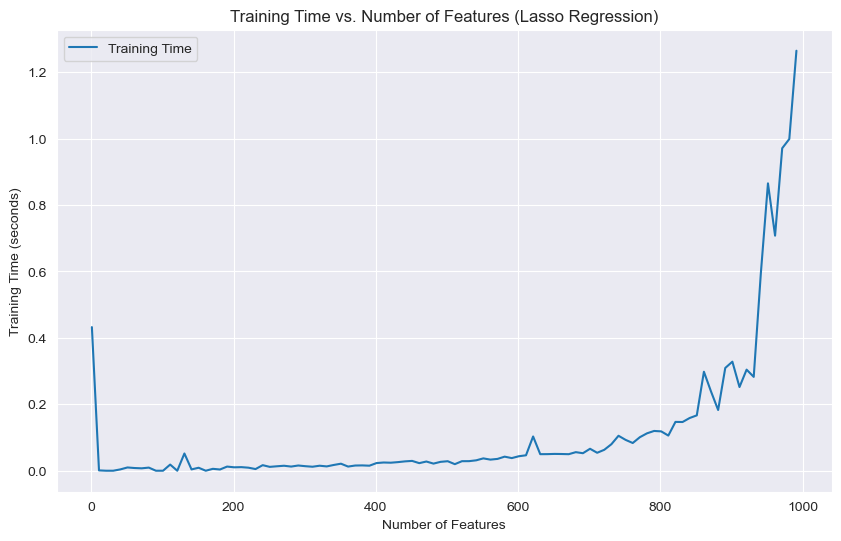

In [8]:
import numpy as np
import pandas as pd
import datetime
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plot
sns.set_style('darkgrid')

def generate_mock_data(num_samples, num_features, coefficient=1.0, noise_std=0.1):
    # Generate random features
    X = np.random.uniform(-10, 10, (num_samples, num_features))
    # Generate coefficients
    coeffs = np.random.uniform(-1, 1, num_features) * coefficient
    # Generate output with added noise
    y = X @ coeffs + np.random.normal(0, noise_std, num_samples)
    return X, y

def measure_training_time(num_samples, num_features):
    # Generate the mock data
    X, y = generate_mock_data(num_samples, num_features)
    # Create the Lasso regression model
    model = Lasso(alpha=0.1)
    # Measure the time taken to fit the model
    start_time = datetime.datetime.now()
    model.fit(X, y)
    end_time = datetime.datetime.now()
    training_time = (end_time - start_time).total_seconds()
    return training_time

# Parameters
num_samples = 1000
max_features = 1000
feature_range = range(1, max_features + 1, 10)  # Use step of 10 for faster computation
training_times = []

# Measure training time for each number of features
for num_features in feature_range:
    training_time = measure_training_time(num_samples, num_features)
    training_times.append(training_time)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(feature_range, training_times, label='Training Time')
plt.xlabel('Number of Features')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Number of Features (Lasso Regression)')
plt.legend()
plt.show()


## Optional (Level Up)

### Show Just How Slow it Can Go!

If you're up for putting your computer through the wringer and are very patient to allow the necessary computations, try increasing the maximum n from 1000 to 10,000 using Lasso regression. You should see an interesting pattern unveil. See if you can make any hypotheses as to why this might occur!

_Note:_ ⏰ _You can expect your code to take over an hour to run on a 2.7 GHz speed CPU!_

Features: 1, Training Time: 0.042063 seconds
Features: 101, Training Time: 0.008678 seconds
Features: 201, Training Time: 0.011738 seconds
Features: 301, Training Time: 0.034165 seconds
Features: 401, Training Time: 0.019898 seconds
Features: 501, Training Time: 0.037068 seconds
Features: 601, Training Time: 0.146025 seconds
Features: 701, Training Time: 0.094337 seconds
Features: 801, Training Time: 0.173965 seconds
Features: 901, Training Time: 0.36272 seconds
Features: 1001, Training Time: 0.826069 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.834e+03, tolerance: 1.230e+03
  model = cd_fast.enet_coordinate_descent(


Features: 1101, Training Time: 1.87944 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.153e+03, tolerance: 1.298e+03
  model = cd_fast.enet_coordinate_descent(


Features: 1201, Training Time: 1.297125 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.837e+03, tolerance: 1.504e+03
  model = cd_fast.enet_coordinate_descent(


Features: 1301, Training Time: 1.279762 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.488e+03, tolerance: 1.616e+03
  model = cd_fast.enet_coordinate_descent(


Features: 1401, Training Time: 1.392061 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.388e+03, tolerance: 1.607e+03
  model = cd_fast.enet_coordinate_descent(


Features: 1501, Training Time: 1.712333 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.017e+03, tolerance: 1.748e+03
  model = cd_fast.enet_coordinate_descent(


Features: 1601, Training Time: 1.679937 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.643e+03, tolerance: 1.813e+03
  model = cd_fast.enet_coordinate_descent(


Features: 1701, Training Time: 1.743112 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.508e+03, tolerance: 2.109e+03
  model = cd_fast.enet_coordinate_descent(


Features: 1801, Training Time: 1.744585 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.714e+03, tolerance: 2.105e+03
  model = cd_fast.enet_coordinate_descent(


Features: 1901, Training Time: 1.887744 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.507e+03, tolerance: 2.202e+03
  model = cd_fast.enet_coordinate_descent(


Features: 2001, Training Time: 1.982795 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+04, tolerance: 2.386e+03
  model = cd_fast.enet_coordinate_descent(


Features: 2101, Training Time: 2.424381 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.909e+03, tolerance: 2.261e+03
  model = cd_fast.enet_coordinate_descent(


Features: 2201, Training Time: 2.280053 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.281e+03, tolerance: 2.502e+03
  model = cd_fast.enet_coordinate_descent(


Features: 2301, Training Time: 2.486335 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.465e+03, tolerance: 2.657e+03
  model = cd_fast.enet_coordinate_descent(


Features: 2401, Training Time: 2.28791 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.141e+03, tolerance: 2.801e+03
  model = cd_fast.enet_coordinate_descent(


Features: 2501, Training Time: 2.530583 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.119e+04, tolerance: 3.082e+03
  model = cd_fast.enet_coordinate_descent(


Features: 2601, Training Time: 2.47338 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.192e+04, tolerance: 3.073e+03
  model = cd_fast.enet_coordinate_descent(


Features: 2701, Training Time: 2.645019 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.031e+04, tolerance: 2.967e+03
  model = cd_fast.enet_coordinate_descent(


Features: 2801, Training Time: 2.782211 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.188e+04, tolerance: 3.245e+03
  model = cd_fast.enet_coordinate_descent(


Features: 2901, Training Time: 2.702074 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.328e+04, tolerance: 3.088e+03
  model = cd_fast.enet_coordinate_descent(


Features: 3001, Training Time: 2.744283 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+04, tolerance: 3.549e+03
  model = cd_fast.enet_coordinate_descent(


Features: 3101, Training Time: 2.918793 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.547e+04, tolerance: 3.941e+03
  model = cd_fast.enet_coordinate_descent(


Features: 3201, Training Time: 2.919418 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.486e+04, tolerance: 3.797e+03
  model = cd_fast.enet_coordinate_descent(


Features: 3301, Training Time: 2.942209 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.300e+04, tolerance: 3.150e+03
  model = cd_fast.enet_coordinate_descent(


Features: 3401, Training Time: 3.183142 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.326e+04, tolerance: 3.938e+03
  model = cd_fast.enet_coordinate_descent(


Features: 3501, Training Time: 3.328271 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e+04, tolerance: 4.225e+03
  model = cd_fast.enet_coordinate_descent(


Features: 3601, Training Time: 3.455631 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.710e+04, tolerance: 4.328e+03
  model = cd_fast.enet_coordinate_descent(


Features: 3701, Training Time: 3.461101 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.720e+04, tolerance: 4.247e+03
  model = cd_fast.enet_coordinate_descent(


Features: 3801, Training Time: 3.598093 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.628e+04, tolerance: 4.291e+03
  model = cd_fast.enet_coordinate_descent(


Features: 3901, Training Time: 3.671435 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.668e+04, tolerance: 4.300e+03
  model = cd_fast.enet_coordinate_descent(


Features: 4001, Training Time: 3.668565 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+04, tolerance: 4.966e+03
  model = cd_fast.enet_coordinate_descent(


Features: 4101, Training Time: 3.879793 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.641e+04, tolerance: 4.576e+03
  model = cd_fast.enet_coordinate_descent(


Features: 4201, Training Time: 3.953479 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e+04, tolerance: 5.030e+03
  model = cd_fast.enet_coordinate_descent(


Features: 4301, Training Time: 3.923846 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.932e+04, tolerance: 5.115e+03
  model = cd_fast.enet_coordinate_descent(


Features: 4401, Training Time: 4.00385 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.009e+04, tolerance: 4.683e+03
  model = cd_fast.enet_coordinate_descent(


Features: 4501, Training Time: 4.094673 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.940e+04, tolerance: 4.994e+03
  model = cd_fast.enet_coordinate_descent(


Features: 4601, Training Time: 4.173466 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.005e+04, tolerance: 5.459e+03
  model = cd_fast.enet_coordinate_descent(


Features: 4701, Training Time: 4.343673 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.083e+04, tolerance: 5.270e+03
  model = cd_fast.enet_coordinate_descent(


Features: 4801, Training Time: 4.42799 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.194e+04, tolerance: 5.604e+03
  model = cd_fast.enet_coordinate_descent(


Features: 4901, Training Time: 4.513291 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.044e+04, tolerance: 5.358e+03
  model = cd_fast.enet_coordinate_descent(


Features: 5001, Training Time: 4.48042 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.500e+04, tolerance: 5.890e+03
  model = cd_fast.enet_coordinate_descent(


Features: 5101, Training Time: 4.551054 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.143e+04, tolerance: 6.107e+03
  model = cd_fast.enet_coordinate_descent(


Features: 5201, Training Time: 4.631979 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.960e+04, tolerance: 5.897e+03
  model = cd_fast.enet_coordinate_descent(


Features: 5301, Training Time: 4.903125 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.244e+04, tolerance: 5.803e+03
  model = cd_fast.enet_coordinate_descent(


Features: 5401, Training Time: 5.915157 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.241e+04, tolerance: 5.799e+03
  model = cd_fast.enet_coordinate_descent(


Features: 5501, Training Time: 4.887845 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.290e+04, tolerance: 6.061e+03
  model = cd_fast.enet_coordinate_descent(


Features: 5601, Training Time: 5.093138 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.977e+04, tolerance: 6.687e+03
  model = cd_fast.enet_coordinate_descent(


Features: 5701, Training Time: 5.209399 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+04, tolerance: 5.763e+03
  model = cd_fast.enet_coordinate_descent(


Features: 5801, Training Time: 5.319772 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.177e+04, tolerance: 6.497e+03
  model = cd_fast.enet_coordinate_descent(


Features: 5901, Training Time: 5.444627 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.504e+04, tolerance: 6.993e+03
  model = cd_fast.enet_coordinate_descent(


Features: 6001, Training Time: 5.320233 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.856e+04, tolerance: 6.615e+03
  model = cd_fast.enet_coordinate_descent(


Features: 6101, Training Time: 5.43273 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.780e+04, tolerance: 6.853e+03
  model = cd_fast.enet_coordinate_descent(


Features: 6201, Training Time: 5.507205 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.855e+04, tolerance: 7.450e+03
  model = cd_fast.enet_coordinate_descent(


Features: 6301, Training Time: 5.739886 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.428e+04, tolerance: 7.000e+03
  model = cd_fast.enet_coordinate_descent(


Features: 6401, Training Time: 5.800589 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.178e+04, tolerance: 7.701e+03
  model = cd_fast.enet_coordinate_descent(


Features: 6501, Training Time: 5.859225 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.569e+04, tolerance: 7.727e+03
  model = cd_fast.enet_coordinate_descent(


Features: 6601, Training Time: 5.959483 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.761e+04, tolerance: 7.108e+03
  model = cd_fast.enet_coordinate_descent(


Features: 6701, Training Time: 5.924565 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.731e+04, tolerance: 6.711e+03
  model = cd_fast.enet_coordinate_descent(


Features: 6801, Training Time: 6.130926 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.691e+04, tolerance: 7.196e+03
  model = cd_fast.enet_coordinate_descent(


Features: 6901, Training Time: 6.070749 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.659e+04, tolerance: 7.512e+03
  model = cd_fast.enet_coordinate_descent(


Features: 7001, Training Time: 6.327491 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.735e+04, tolerance: 7.852e+03
  model = cd_fast.enet_coordinate_descent(


Features: 7101, Training Time: 6.501019 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.233e+04, tolerance: 7.810e+03
  model = cd_fast.enet_coordinate_descent(


Features: 7201, Training Time: 6.545564 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.938e+04, tolerance: 8.463e+03
  model = cd_fast.enet_coordinate_descent(


Features: 7301, Training Time: 6.45705 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.139e+04, tolerance: 8.614e+03
  model = cd_fast.enet_coordinate_descent(


Features: 7401, Training Time: 6.522751 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.143e+04, tolerance: 8.142e+03
  model = cd_fast.enet_coordinate_descent(


Features: 7501, Training Time: 6.734443 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.029e+04, tolerance: 8.066e+03
  model = cd_fast.enet_coordinate_descent(


Features: 7601, Training Time: 6.90027 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.333e+04, tolerance: 9.115e+03
  model = cd_fast.enet_coordinate_descent(


Features: 7701, Training Time: 6.732335 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.798e+04, tolerance: 8.472e+03
  model = cd_fast.enet_coordinate_descent(


Features: 7801, Training Time: 6.953045 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.617e+04, tolerance: 9.344e+03
  model = cd_fast.enet_coordinate_descent(


Features: 7901, Training Time: 7.10075 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.169e+04, tolerance: 8.635e+03
  model = cd_fast.enet_coordinate_descent(


Features: 8001, Training Time: 7.150826 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.984e+04, tolerance: 8.975e+03
  model = cd_fast.enet_coordinate_descent(


Features: 8101, Training Time: 7.333886 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.172e+04, tolerance: 9.160e+03
  model = cd_fast.enet_coordinate_descent(


Features: 8201, Training Time: 7.1546 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.977e+04, tolerance: 9.118e+03
  model = cd_fast.enet_coordinate_descent(


Features: 8301, Training Time: 7.340864 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.310e+04, tolerance: 8.954e+03
  model = cd_fast.enet_coordinate_descent(


Features: 8401, Training Time: 7.666388 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.445e+04, tolerance: 9.730e+03
  model = cd_fast.enet_coordinate_descent(


Features: 8501, Training Time: 7.601337 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.527e+04, tolerance: 9.682e+03
  model = cd_fast.enet_coordinate_descent(


Features: 8601, Training Time: 7.534077 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.682e+04, tolerance: 1.064e+04
  model = cd_fast.enet_coordinate_descent(


Features: 8701, Training Time: 7.865654 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.558e+04, tolerance: 9.592e+03
  model = cd_fast.enet_coordinate_descent(


Features: 8801, Training Time: 7.780298 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.581e+04, tolerance: 1.048e+04
  model = cd_fast.enet_coordinate_descent(


Features: 8901, Training Time: 7.72009 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.589e+04, tolerance: 9.658e+03
  model = cd_fast.enet_coordinate_descent(


Features: 9001, Training Time: 7.972377 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.148e+04, tolerance: 9.910e+03
  model = cd_fast.enet_coordinate_descent(


Features: 9101, Training Time: 8.098426 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.883e+04, tolerance: 1.005e+04
  model = cd_fast.enet_coordinate_descent(


Features: 9201, Training Time: 8.118465 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.858e+04, tolerance: 1.063e+04
  model = cd_fast.enet_coordinate_descent(


Features: 9301, Training Time: 8.089111 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.151e+04, tolerance: 1.057e+04
  model = cd_fast.enet_coordinate_descent(


Features: 9401, Training Time: 8.201203 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.551e+04, tolerance: 1.063e+04
  model = cd_fast.enet_coordinate_descent(


Features: 9501, Training Time: 8.339119 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.828e+04, tolerance: 1.070e+04
  model = cd_fast.enet_coordinate_descent(


Features: 9601, Training Time: 8.564649 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.232e+04, tolerance: 1.132e+04
  model = cd_fast.enet_coordinate_descent(


Features: 9701, Training Time: 8.549903 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.013e+04, tolerance: 1.083e+04
  model = cd_fast.enet_coordinate_descent(


Features: 9801, Training Time: 9.234559 seconds


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.894e+04, tolerance: 1.097e+04
  model = cd_fast.enet_coordinate_descent(


Features: 9901, Training Time: 12.632382 seconds


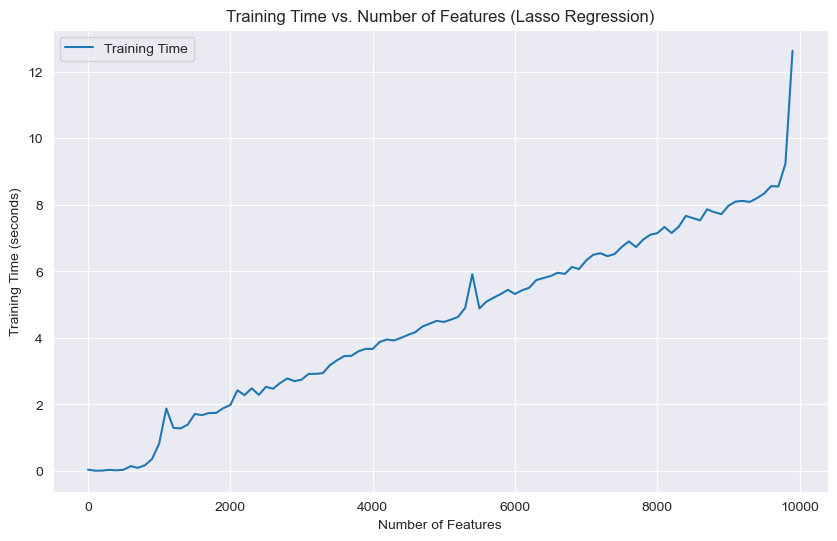

In [9]:
# Setting the style for the plot
sns.set_style('darkgrid')

def generate_mock_data(num_samples, num_features, coefficient=1.0, noise_std=0.1):
    # Generate random features
    X = np.random.uniform(-10, 10, (num_samples, num_features))
    # Generate coefficients
    coeffs = np.random.uniform(-1, 1, num_features) * coefficient
    # Generate output with added noise
    y = X @ coeffs + np.random.normal(0, noise_std, num_samples)
    return X, y

def measure_training_time(num_samples, num_features):
    # Generate the mock data
    X, y = generate_mock_data(num_samples, num_features)
    # Create the Lasso regression model
    model = Lasso(alpha=0.1)
    # Measure the time taken to fit the model
    start_time = datetime.datetime.now()
    model.fit(X, y)
    end_time = datetime.datetime.now()
    training_time = (end_time - start_time).total_seconds()
    return training_time

# Parameters
num_samples = 1000
max_features = 10000
feature_range = range(1, max_features + 1, 100)  # Use step of 100 for faster computation
training_times = []

# Measure training time for each number of features
for num_features in feature_range:
    training_time = measure_training_time(num_samples, num_features)
    training_times.append(training_time)
    print(f'Features: {num_features}, Training Time: {training_time} seconds')  # Optional: print progress

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(feature_range, training_times, label='Training Time')
plt.xlabel('Number of Features')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Number of Features (Lasso Regression)')
plt.legend()
plt.show()

## Summary

In this lab, you conducted various simulations to investigate the curse of dimensionality. This demonstrated some of the caveats of working with large datasets with an increasing number of features. With that, the next section will explore principal component analysis, a means of reducing the number of features in a dataset while preserving as much information as possible.